In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 1.- Carga del archivo .csv

In [3]:
df = pd.read_csv('../data/heart_2020_cleaned.csv', sep=",")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


# 2.- Descripción de los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [7]:
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

Filas: 319795
Columnas: 18


Reporte de variables

In [8]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T
data_report(df)

COL_N,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
DATA_TYPE,object,float64,object,object,object,float64,float64,object,object,object,object,object,object,object,float64,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,2,3604,2,2,2,31,31,2,2,13,6,4,2,5,24,2,2,2
CARDIN (%),0.0,1.13,0.0,0.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0


# 3.- Eliminación de duplicados

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(301717, 18)

319795-301717=18078
El dataframe tiene 18078 registros duplicados que vamos a eliminar

## 4.- EDA

In [10]:
categ_data=[]
for i in df.columns:
    if df[i].dtype==object  :
        categ_data.append (i)
print(categ_data)

['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


Text(0.5, 1.0, 'BMI')

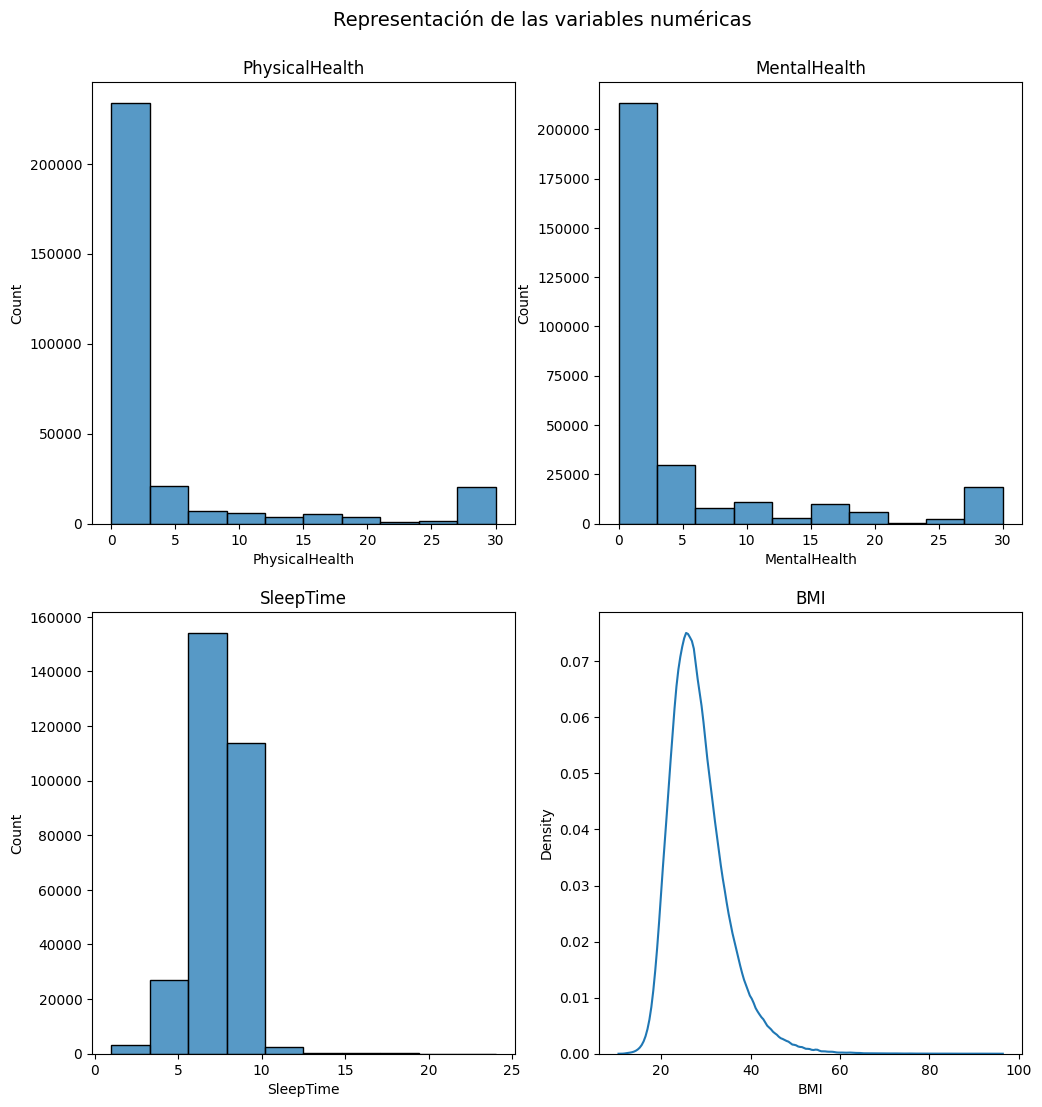

In [11]:
# plt.title('Representación de las variables numéricas')
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Representación de las variables numéricas', fontsize=14)
plt.subplots_adjust(top=0.92 )

plt.subplots_adjust(hspace = 0.2)

sns.histplot(df['PhysicalHealth'], ax=axes[0, 0], bins=10)
axes[0, 0].set_title("PhysicalHealth")

sns.histplot(df['MentalHealth'], ax=axes[0, 1], bins=10)
axes[0, 1].set_title("MentalHealth")

sns.histplot(df['SleepTime'], ax=axes[1, 0], bins=10)
axes[1, 0].set_title("SleepTime")

sns.kdeplot(df['BMI'], ax=axes[1, 1])
axes[1, 1].set_title("BMI")

In [12]:
categ_data

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

<Axes: xlabel='SkinCancer', ylabel='count'>

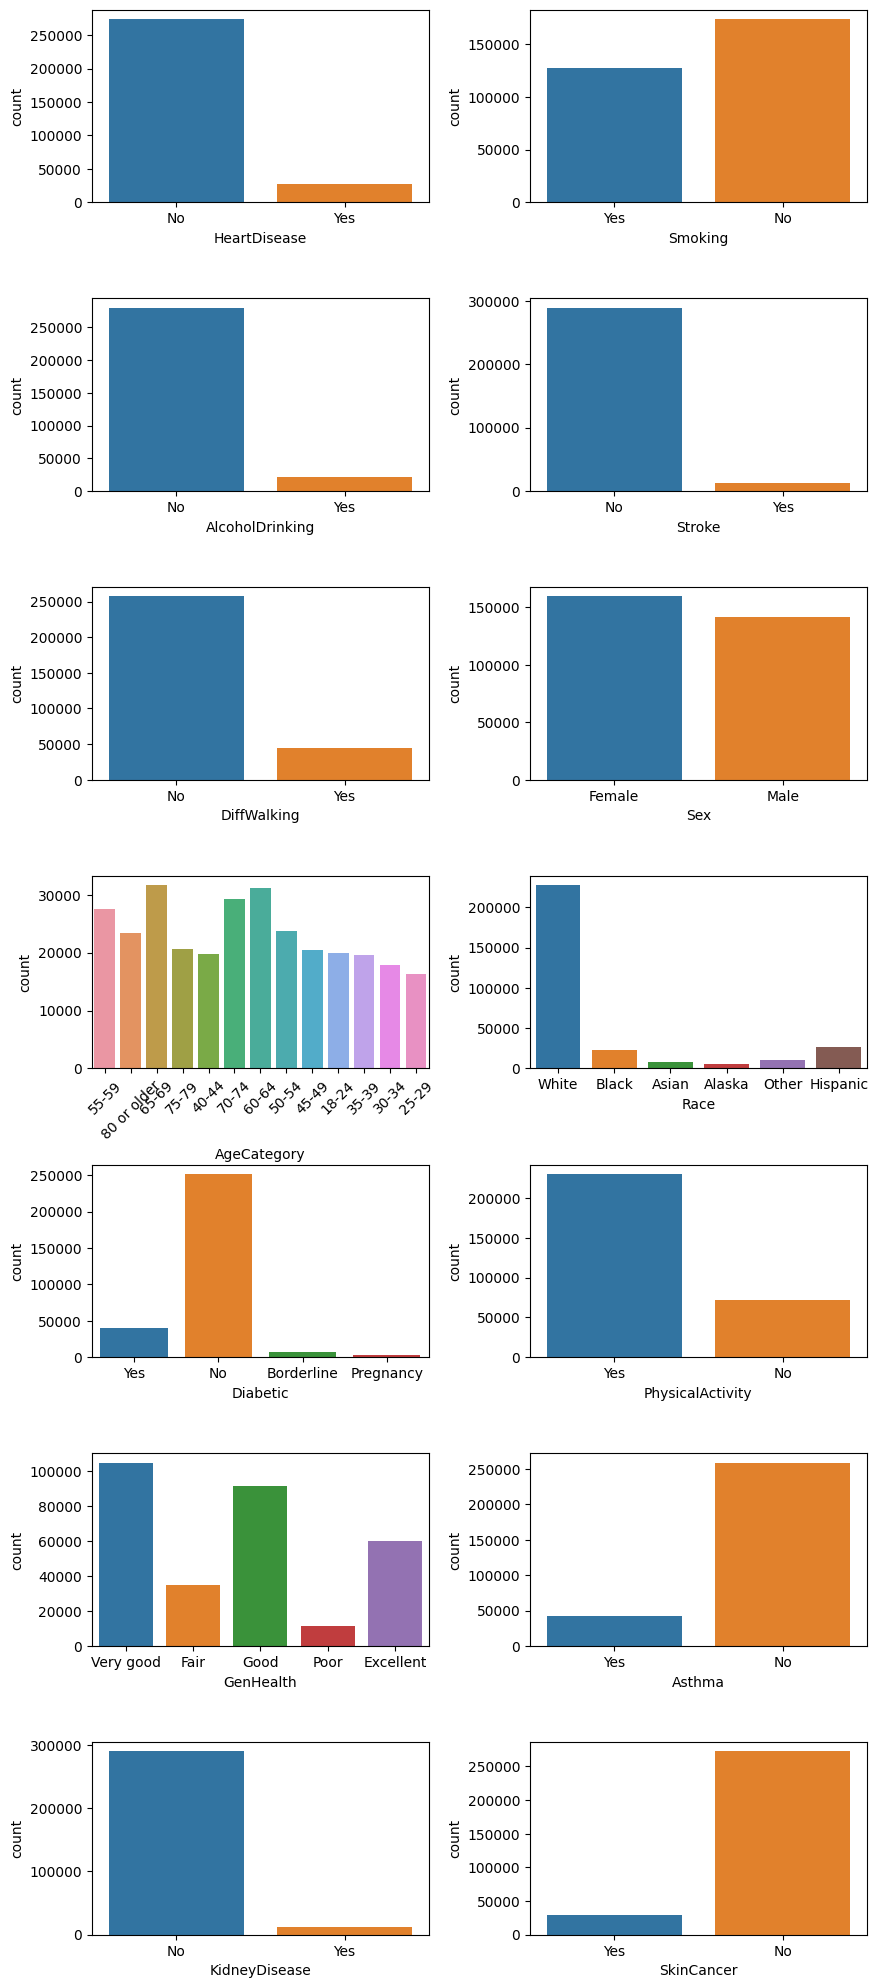

In [13]:
fig, axes = plt.subplots(7, 2, figsize=(10, 25))
plt.subplots_adjust(hspace = 0.5, wspace=0.3)

sns.countplot(x=df["HeartDisease"], ax=axes[0,0])
# axes[0,0].set_title("HeartDisease")

sns.countplot(x=df["Smoking"], ax=axes[0,1])
# axes[0,1].set_title("Smoking")

sns.countplot(x=df["AlcoholDrinking"], ax=axes[1,0])
# axes[1,0].set_title("AlcoholDrinking")

sns.countplot(x=df["Stroke"], ax=axes[1,1])
# axes[1,1].set_title("Stroke")

sns.countplot(x=df["DiffWalking"], ax=axes[2,0])
# axes[2,0].set_title("DiffWalking")

sns.countplot(x=df["Sex"], ax=axes[2,1])
# axes[2,1].set_title("Sex")

sns.countplot(x=df["AgeCategory"], ax=axes[3,0])
axes[3,0].set_xticklabels(labels=df['AgeCategory'].unique(), rotation=45, ha='center')
# axes[3,0].set_title("AgeCategory")

sns.countplot(x=df["Race"], ax=axes[3,1])
axes[3,1].set_xticklabels(labels=['White', 'Black', 'Asian', 'Alaska', 'Other', 'Hispanic'], rotation=0, ha='center')
# axes[3,1].set_title("Race")

sns.countplot(x=df["Diabetic"], ax=axes[4,0])
axes[4,0].set_xticklabels(labels=['Yes', 'No', 'Borderline', 'Pregnancy'], rotation=0, ha='center')
# axes[4,0].set_title("Diabetic")

sns.countplot(x=df["PhysicalActivity"], ax=axes[4,1])
# axes[4,1].set_title("PhysicalActivity")

sns.countplot(x=df["GenHealth"], ax=axes[5,0])
# axes[5,0].set_title("GenHealth")

sns.countplot(x=df["Asthma"], ax=axes[5,1])
# axes[5,1].set_title("Asthma")

sns.countplot(x=df["KidneyDisease"], ax=axes[6,0])
# axes[6,0].set_title("KidneyDisease")

sns.countplot(x=df["SkinCancer"], ax=axes[6,1])
# axes[6,1].set_title("SkinCancer")


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
interval columns not set, guessing: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


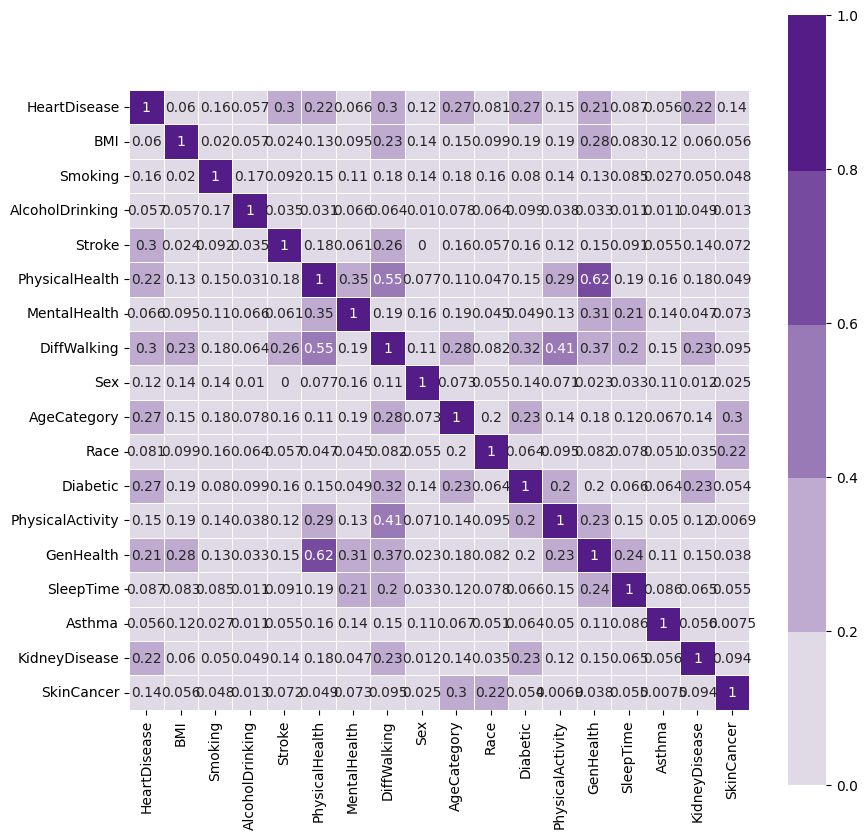

In [14]:
# !pip install phik
import phik
phik_matrix = df.phik_matrix()

plt.figure(figsize=(10,10))
sns.heatmap(phik_matrix,
            vmin=0,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

In [15]:
# for ft in categ_data:
#     plt.figure(figsize=(2,2))
#     sns.countplot(x=df[ft],  color="#4974a5")
#     plt.title(ft , fontsize=15)
#     plt.xlabel(ft, fontsize=10)
#     plt.ylabel("Count", fontsize=10)
#     plt.show()

# 4.- Transformación de variables categóricas en numéricas

Por medio de map, y con diccionarios específicos para cada variable, convierto las variables categóricas en numéricas:
- Race: por medio de diccionario dict_race
- Diabetic: por medio del diccionario dict_diab
- Sex: con el diccionario dict_sex
- AgeCategory: cada tramo de edad tiene asignado un número del 1 al 12 con el diccionario dict_age
- Resto de variables: Yes y No se transforman en 1 y 0 con el diccionario dict_yes_no

In [16]:
lista_race=df['Race'].unique().tolist()
lista_race= sorted(lista_race)
lista_race= list(enumerate(lista_race))
lista_intercambiada = [(tupla[1], tupla[0]) for tupla in lista_race]
dict_race= dict(lista_intercambiada)
dict_race

{'American Indian/Alaskan Native': 0,
 'Asian': 1,
 'Black': 2,
 'Hispanic': 3,
 'Other': 4,
 'White': 5}

In [17]:
lista_age= df['AgeCategory'].unique().tolist()
lista_age= sorted(lista_age)
lista_age= list(enumerate(lista_age))
lista_intercambiada = [(tupla[1], tupla[0]) for tupla in lista_age]
dict_age= dict(lista_intercambiada)
dict_age

{'18-24': 0,
 '25-29': 1,
 '30-34': 2,
 '35-39': 3,
 '40-44': 4,
 '45-49': 5,
 '50-54': 6,
 '55-59': 7,
 '60-64': 8,
 '65-69': 9,
 '70-74': 10,
 '75-79': 11,
 '80 or older': 12}

In [18]:
dict_race={'American Indian/Alaskan Native': 0,
 'Asian': 1,
 'Black': 2,
 'Hispanic': 3,
 'Other': 4,
 'White': 5}
dict_diab={'No': 0, 'No, borderline diabetes': 1, 'Yes (during pregnancy)': 2, 'Yes': 3}
dict_health={'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}
dict_yes_no = {'Yes':1, 'No':0}
dict_sex= {'Male':1, 'Female':0}
for columna in df.columns:
    if columna=='Sex':
        df[columna]=df[columna].map(dict_sex)
    elif columna=='AgeCategory':
        df[columna]=df[columna].map(dict_age)
    elif columna== 'Race':
        df[columna]= df[columna].map(dict_race)
    elif columna=='GenHealth':
        df[columna]= df[columna].map(dict_health)
    elif columna=='Diabetic':
        df[columna]= df[columna].map(dict_diab)   
    elif df[columna].dtypes==object:
        df[columna]=df[columna].map(dict_yes_no)
    else:
          pass
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,3,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,3,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,3,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDisease,301717.0,0.090353,0.286687,0.00,0.00,0.00,0.00,1.00
BMI,301717.0,28.441970,6.468134,12.02,24.03,27.41,31.65,94.85
Smoking,301717.0,0.422267,0.493921,0.00,0.00,0.00,1.00,1.00
AlcoholDrinking,301717.0,0.071527,0.257704,0.00,0.00,0.00,0.00,1.00
Stroke,301717.0,0.039984,0.195923,0.00,0.00,0.00,0.00,1.00
PhysicalHealth,301717.0,3.572298,8.140656,0.00,0.00,0.00,2.00,30.00
MentalHealth,301717.0,4.121475,8.128288,0.00,0.00,0.00,4.00,30.00
DiffWalking,301717.0,0.147009,0.354115,0.00,0.00,0.00,0.00,1.00
Sex,301717.0,0.470792,0.499147,0.00,0.00,0.00,1.00,1.00
AgeCategory,301717.0,6.509408,3.584510,0.00,4.00,7.00,9.00,12.00


5.- División entre train y test

Se reserva una porción de los datos para poder testear el modelo

In [20]:
from sklearn.model_selection import train_test_split
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape

(241373, 17)

Creación del df para la etapa de training y validation

In [21]:
df= pd.DataFrame(X_train)
df['HeartDisease']= y_train
df.reset_index(inplace=True, drop=True)
df.to_csv('../data/df.csv', index=False)
df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.97,1,0,0,0.0,2.0,0,0,10,5,0,1,3,7.0,0,0,0,0
1,39.16,0,0,0,0.0,0.0,0,0,3,5,0,0,3,8.0,0,0,0,0
2,26.97,0,0,1,20.0,0.0,0,1,10,5,3,0,0,7.0,0,1,0,1
3,24.41,1,0,0,0.0,30.0,0,0,4,5,0,1,3,5.0,0,0,0,0
4,22.15,0,0,0,0.0,0.0,0,1,10,5,0,1,4,8.0,0,0,0,0


Creación del dataframe llamado df_test para la etapa de testing

In [22]:
df_test=pd.DataFrame(X_test)
df_test['HeartDisease']=y_test
df_test.reset_index(inplace=True, drop=True)
df_test.to_csv('../data/df_test.csv', index=False)
df_test.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,35.59,0,0,0,0.0,2.0,1,0,9,2,0,1,3,8.0,0,0,0,0
1,27.80,0,0,0,0.0,0.0,0,1,11,2,3,1,2,8.0,1,0,0,0
2,25.79,0,0,0,2.0,2.0,0,0,6,5,0,1,3,8.0,0,0,0,0
3,38.47,1,0,1,1.0,1.0,0,0,6,2,3,1,2,10.0,0,0,0,1
4,27.32,0,0,0,0.0,2.0,0,0,4,2,0,1,3,8.0,0,0,0,0


# 5.- Análisis de outliers

Un outlier es una observación anormal y extrema en una muestra estadística o serie temporal de datos que puede afectar potencialmente a la estimación de los parámetros del mismo. En palabras más sencillas, un outlier sería una observación dentro de una muestra o una serie temporal de datos que no es consistente con el resto.

Desde el punto de vista estadístico, es el conjunto de los datos que cumplen cualquiera de estos dos criterios:


5.1.- Dataframe con datos estadisticos df_estadistica, a partir del df.describe()

Calculo los percentiles Q1, Q3 e IQR=Q3-Q1, para detectar los outliers en las 4 variables numéricas originales: 
- BMI
- PhysicalHealth
- MentalHealth
- SleepTime

Text(0.5, 1.0, 'BMI')

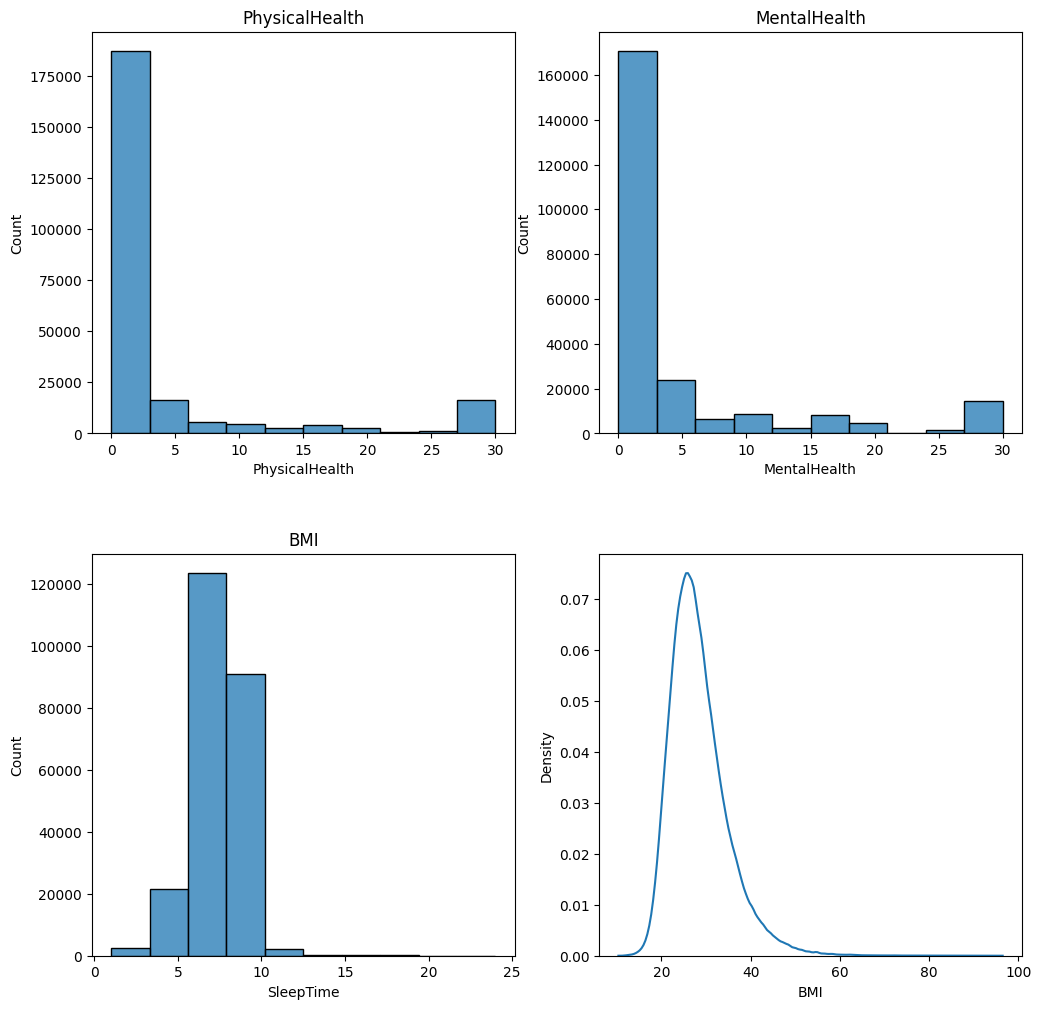

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
plt.subplots_adjust(hspace = 0.3)

sns.histplot(df['PhysicalHealth'], ax=axes[0, 0], bins=10)
axes[0, 0].set_title("PhysicalHealth")

sns.histplot(df['MentalHealth'], ax=axes[0, 1], bins=10)
axes[0, 1].set_title("MentalHealth")

sns.histplot(df['SleepTime'], ax=axes[1, 0], bins=10)
axes[1, 0].set_title("SleepTime")

sns.kdeplot(df['BMI'], ax=axes[1, 1])
axes[1, 0].set_title("BMI")

In [24]:
# Outliers +-3IQR
df_estadistica= pd.DataFrame(df.describe())
df_estadistica.loc['IQR']=df_estadistica.loc['75%']-df_estadistica.loc['25%']
df_estadistica.loc['Q1-1.5IQR']= df_estadistica.loc['25%']-1.5*df_estadistica.loc['IQR']
df_estadistica.loc['Q3+1.5IQR']= df_estadistica.loc['75%']+1.5*df_estadistica.loc['IQR']
df_estadistica.T


,count,mean,std,min,25%,50%,75%,max,IQR,Q1-1.5IQR,Q3+1.5IQR
BMI,241373.0,28.439503,6.470049,12.02,24.03,27.41,31.65,94.85,7.62,12.6,43.08
Smoking,241373.0,0.422094,0.493894,0.00,0.00,0.00,1.00,1.00,1.00,-1.5,2.50
AlcoholDrinking,241373.0,0.071611,0.257844,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00
Stroke,241373.0,0.039992,0.195941,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00
PhysicalHealth,241373.0,3.571675,8.136364,0.00,0.00,0.00,2.00,30.00,2.00,-3.0,5.00
MentalHealth,241373.0,4.123353,8.128918,0.00,0.00,0.00,4.00,30.00,4.00,-6.0,10.00
DiffWalking,241373.0,0.147531,0.354635,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00
Sex,241373.0,0.471283,0.499176,0.00,0.00,0.00,1.00,1.00,1.00,-1.5,2.50
AgeCategory,241373.0,6.505462,3.584057,0.00,4.00,7.00,9.00,12.00,5.00,-3.5,16.50
Race,241373.0,4.366681,1.233353,0.00,5.00,5.00,5.00,5.00,0.00,5.0,5.00


5.2.- Dataframe de outliers

Creo un nuevo dataframe llamado df_outliers en el que cojo los outliers que cumplen el criterio q> Q3+3IQR ó q< Q1-3IQR

In [25]:
df_outliers= df.loc[lambda row: (row['BMI']>df_estadistica.loc['Q3+1.5IQR']['BMI']) | 
                    (row['PhysicalHealth']>df_estadistica.loc['Q3+1.5IQR']['PhysicalHealth']) | 
                    (row['MentalHealth']>df_estadistica.loc['Q3+1.5IQR']['MentalHealth']) | 
                    (row['SleepTime']>df_estadistica.loc['Q3+1.5IQR']['SleepTime'])]
df_outliers.reset_index(inplace=True, drop=True)
df_outliers.shape

(62773, 18)

In [26]:
df_outliers_test= df_test.loc[lambda row: (row['BMI']>df_estadistica.loc['Q3+1.5IQR']['BMI']) | 
                    (row['PhysicalHealth']>df_estadistica.loc['Q3+1.5IQR']['PhysicalHealth']) | 
                    (row['MentalHealth']>df_estadistica.loc['Q3+1.5IQR']['MentalHealth']) | 
                    (row['SleepTime']>df_estadistica.loc['Q3+1.5IQR']['SleepTime'])]
df_outliers_test.reset_index(inplace=True, drop=True)
df_outliers_test.shape

(15635, 18)

Apenas hay 1000 registros por debajo de Q1-3IQR, que mantendremos dentro del resto de los datos ya que sería más difícil encontrar un modelo de Machine Learning que se ajuste tanto por arriba como por los outliers superiores como por los inferiores. 

In [27]:
df_outliers_down= df.loc[lambda row: (row['BMI']<df_estadistica.loc['Q1-1.5IQR']['BMI']) | 
                         (row['PhysicalHealth']<df_estadistica.loc['Q1-1.5IQR']['PhysicalHealth']) | 
                         (row['MentalHealth']<df_estadistica.loc['Q1-1.5IQR']['MentalHealth']) | 
                         (row['SleepTime']<df_estadistica.loc['Q1-1.5IQR']['SleepTime'])]
df_outliers_down.shape

(1084, 18)

In [28]:
out_down_phy= df[df['PhysicalHealth']<df_estadistica.loc['Q1-1.5IQR', 'PhysicalHealth']]
out_down_phy.shape

(0, 18)

In [29]:
out_down_men= df[df['MentalHealth']<df_estadistica.loc['Q1-1.5IQR', 'MentalHealth']]
out_down_men


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease


In [30]:
out_down_sleep= df[df['SleepTime']<df_estadistica.loc['Q1-1.5IQR', 'SleepTime']]
out_down_sleep.shape

(1065, 18)

In [31]:
# Cálculo de outliers en cada columna:

# out_up_bmi= df[df['BMI']>df_estadistica.loc['Q3+3IQR', 'BMI']]
# out_down_phy= df[df['PhysicalHealth']<df_estadistica.loc['Q1-3IQR', 'PhysicalHealth']]
# out_up_phy= df[df['PhysicalHealth']>df_estadistica.loc['Q3+3IQR', 'PhysicalHealth']]
# out_down_men= df[df['MentalHealth']<df_estadistica.loc['Q1-3IQR', 'MentalHealth']]
# out_up_men= df[df['MentalHealth']>df_estadistica.loc['Q3+3IQR', 'MentalHealth']]
# out_down_sleep= df[df['SleepTime']<df_estadistica.loc['Q1-3IQR', 'SleepTime']]
# out_up_sleep= df[df['SleepTime']>df_estadistica.loc['Q3+3IQR', 'SleepTime']]

In [32]:
out_up_phy= df[df['PhysicalHealth']>df_estadistica.loc['Q3+1.5IQR', 'PhysicalHealth']][df['HeartDisease']==1]
out_up_phy.shape

C:\Users\Alfonso\AppData\Local\Temp\ipykernel_3992\3682053788.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  out_up_phy= df[df['PhysicalHealth']>df_estadistica.loc['Q3+1.5IQR', 'PhysicalHealth']][df['HeartDisease']==1]


(7190, 18)

In [33]:
out_up_bmi= df[df['BMI']>df_estadistica.loc['Q3+1.5IQR', 'BMI']][df['HeartDisease']==1]
out_up_bmi.shape

C:\Users\Alfonso\AppData\Local\Temp\ipykernel_3992\896688605.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  out_up_bmi= df[df['BMI']>df_estadistica.loc['Q3+1.5IQR', 'BMI']][df['HeartDisease']==1]


(806, 18)

In [34]:
out_up_men= df[df['MentalHealth']>df_estadistica.loc['Q3+1.5IQR', 'MentalHealth']][df['HeartDisease']==1]
out_up_men.shape

C:\Users\Alfonso\AppData\Local\Temp\ipykernel_3992\3147453537.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  out_up_men= df[df['MentalHealth']>df_estadistica.loc['Q3+1.5IQR', 'MentalHealth']][df['HeartDisease']==1]


(3468, 18)

In [35]:
out_up_sleep= df[df['SleepTime']>df_estadistica.loc['Q3+1.5IQR', 'SleepTime']][df['HeartDisease']==1]
out_up_sleep.shape

C:\Users\Alfonso\AppData\Local\Temp\ipykernel_3992\3238789897.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  out_up_sleep= df[df['SleepTime']>df_estadistica.loc['Q3+1.5IQR', 'SleepTime']][df['HeartDisease']==1]


(467, 18)

Distribución de outliers

Si tomamos como criterio q<Q1-1.5IQR, o q>Q3+1.5IQR, obtenemos un total de 63392 elementos. La gran mayoría se sitúan por encima de Q3, apenas hay outliers por debajo de Q1, ya que resultan valores muy bajos o incluso negativos. Se desglosan en:

- Physical Health : 37723, de ellos el 19% es positivo en HeartDisease
- Mental Health:  31766, el 10,9% es positivo en HeartDisease
- BMI: 7127, y el 11,3% es positivo en HeartDisease
- Sleep Time: 2575, y el 18.1% es positivo en HeartDisease

En los cuatro casos hay un porcentaje de positivos por encima del valor medio del 9%. Por ello, considero que se debe analizar la posibilidad de desarrollar un modelo de Machine Learning específico para estos sujetos.

In [36]:
df_outliers.describe()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
count,62773.000000,62773.000000,62773.000000,62773.000000,62773.000000,62773.000000,62773.000000,62773.000000,62773.000000,62773.000000,62773.000000,62773.000000,62773.000000,62773.000000,62773.000000,62773.000000,62773.000000,62773.000000
mean,30.696590,0.505695,0.073121,0.070285,12.491756,12.555382,0.332324,0.404218,6.377232,4.345770,0.642044,0.635831,1.858681,6.986220,0.212798,0.070158,0.094037,0.140586
std,8.732345,0.499972,0.260336,0.255629,11.977378,11.900369,0.471050,0.490744,3.558814,1.242656,1.200724,0.481200,1.140579,2.043523,0.409290,0.255414,0.291883,0.347597
min,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,28.790000,1.000000,0.000000,0.000000,10.000000,12.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,34.870000,1.000000,0.000000,0.000000,29.000000,25.000000,1.000000,1.000000,9.000000,5.000000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000
max,94.850000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
df_outliers['HeartDisease'].value_counts(normalize=True)

HeartDisease
0    0.859414
1    0.140586
Name: proportion, dtype: float64

El % de positivos pasa del 9 al 14,6 en el df_outliers

In [38]:
df_outliers= df_outliers.drop_duplicates()
# hay 60 filas duplicadas, parece que eran filas que resultaban ser outliers respecto de más de una variable.

In [39]:
df_outliers.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,26.97,0,0,1,20.0,0.0,0,1,10,5,3,0,0,7.0,0,1,0,1
1,24.41,1,0,0,0.0,30.0,0,0,4,5,0,1,3,5.0,0,0,0,0
2,28.29,0,0,0,2.0,25.0,0,0,0,5,0,1,2,7.0,0,0,0,0
3,28.13,1,0,0,30.0,0.0,0,1,10,5,0,1,2,8.0,0,0,0,0
4,19.40,1,0,1,30.0,15.0,1,0,7,5,0,1,4,6.0,0,0,0,1


5.3.- Dataframe sin outliers

Al df original le elimino las filas que había juntado en el df_outliers. En los estudios valoraré la posibilidad de crear un modelo alternativo únicamente para los outliers, en caso de que un único modelo no generalice bien para todos los casos.

In [40]:
df_sin_outliers = df.drop(df_outliers.index)
df_sin_outliers.reset_index(inplace=True, drop=True)
df_sin_outliers_test = df_test.drop(df_outliers_test.index)
df_sin_outliers_test.reset_index(inplace=True, drop=True)

In [41]:
df_sin_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,178600.0,28.440897,6.474812,12.02,24.03,27.4,31.65,94.85
Smoking,178600.0,0.421282,0.493766,0.00,0.00,0.0,1.00,1.00
AlcoholDrinking,178600.0,0.071797,0.258153,0.00,0.00,0.0,0.00,1.00
Stroke,178600.0,0.040403,0.196903,0.00,0.00,0.0,0.00,1.00
PhysicalHealth,178600.0,3.571305,8.138560,0.00,0.00,0.0,2.00,30.00
MentalHealth,178600.0,4.135980,8.144452,0.00,0.00,0.0,4.00,30.00
DiffWalking,178600.0,0.147900,0.355002,0.00,0.00,0.0,0.00,1.00
Sex,178600.0,0.470582,0.499135,0.00,0.00,0.0,1.00,1.00
AgeCategory,178600.0,6.504950,3.586141,0.00,4.00,7.0,9.00,12.00
Race,178600.0,4.367665,1.231819,0.00,5.00,5.0,5.00,5.00


In [42]:
df_sin_outliers['HeartDisease'].value_counts(normalize=True)

HeartDisease
0    0.908891
1    0.091109
Name: proportion, dtype: float64

En este dataframe la fracción de positivos se reduce hasta el 7,3%

In [43]:
df.to_csv('../data/df.csv', index=False)
df_outliers.to_csv('../data/df_outliers.csv', index= False)
df_sin_outliers.to_csv('../data/df_sin_outliers.csv', index=False)
df_outliers_test.to_csv('../data/df_outliers_test.csv', index= False)
df_sin_outliers_test.to_csv('../data/df_sin_outliers_test.csv', index=False)

## 6.- EDA

6.1.- Representación gráfica de las 4 variables numéricas originales

In [44]:
# df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].plot(kind = "box", figsize = (10,4), subplots = True, color='red')

In [45]:
# import plotly.express as px

# fig = px.pie(df, values='BMI', names='BMI', title='Age or interviewed people')
# fig.show()

C:\Users\Alfonso\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


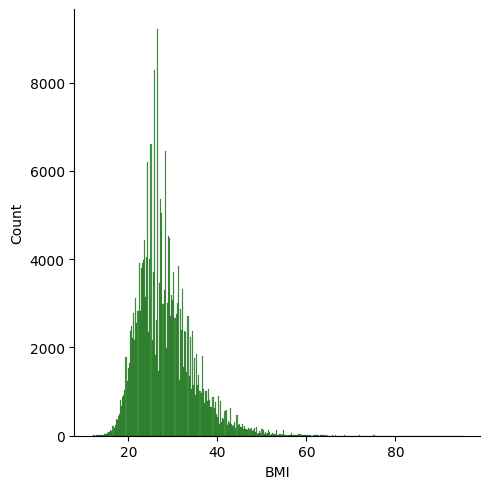

In [46]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.displot(
    df,
    x="BMI", 
    color= 'green'
 )

In [47]:
correlacion = df.corrwith(df['HeartDisease']).sort_values(ascending=False)
correlacion

HeartDisease        1.000000
AgeCategory         0.239694
DiffWalking         0.199346
Stroke              0.196965
Diabetic            0.177648
PhysicalHealth      0.166949
KidneyDisease       0.144964
Smoking             0.105966
SkinCancer          0.088765
Sex                 0.075205
BMI                 0.049024
Race                0.043800
Asthma              0.034470
MentalHealth        0.022353
SleepTime           0.010200
AlcoholDrinking    -0.036704
PhysicalActivity   -0.093606
GenHealth          -0.238519
dtype: float64

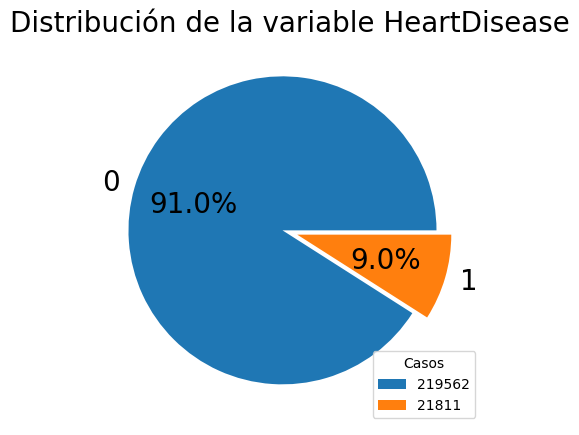

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = df['HeartDisease'].value_counts().index
sizes = df['HeartDisease'].value_counts()

plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"},
        explode=[0.05, 0.05])
plt.title('Distribución de la variable HeartDisease',color = 'black',fontsize = 20)
plt.legend(df.HeartDisease.value_counts(), loc = 'lower right', title = 'Casos')
plt.show()

In [49]:
# sns.countplot(x=df['AlcoholDrinking'])

In [50]:
# sns.displot(
#     df,
#     x="AlcoholDrinking", 
#     color= 'green',
#   )

In [51]:
# sns.displot(
#     df,
#     x="HeartDisease", 
#     color= 'green',
#      )

In [52]:
# import plotly.express as px
# # df = px.data.tips()
# fig = px.histogram(df, x="BMI", nbins=30)
# fig.show()

In [53]:
# sns.displot(
#     df,
#     x="Smoking", 
#     color= 'green', 
#     )

In [54]:
# sns.displot(
#     df,
#     x="Stroke", 
#     color= 'green',
#   )

In [55]:
# import plotly.express as px

# fig = px.bar(df, x='Smoking', title='Poblacion fumadora')
# fig.show()

In [56]:
# import plotly.express as px
# # df = px.data.tips()
# fig = px.histogram(df, x="PhysicalHealth", nbins=30)
# fig.show()

In [57]:
# sns.displot(
#     df,
#     x="PhysicalHealth", 
#     color= 'blue'
#  )

In [58]:
# sns.displot(
#     df,
#     x="MentalHealth", 
#     color= 'green'
#  )

In [59]:
# import plotly.express as px
# # df = px.data.tips()
# fig = px.histogram(df, x="MentalHealth", nbins=30)
# fig.show()

In [60]:
# sns.displot(
#     df,
#     x="SleepTime", 
#     color= 'green'
#  )

In [61]:
# import plotly.express as px
# # df = px.data.tips()
# fig = px.histogram(df, x="SleepTime", nbins=30)
# fig.show()

In [62]:
# import plotly.express as px
# # df = px.data.tips()
# fig = px.box(df_numerical, y="BMI")
# fig.show()

In [63]:
# sns.displot(
#     df,
#     x="BMI", 
#     color= 'green'
#  )

In [64]:
# sns.displot(
#     df,
#     x="PhysicalHealth", 
#     color= 'green'
#  )

In [65]:
# import plotly.express as px
# # df = px.data.tips()
# fig = px.box(df_numerical, y="PhysicalHealth")
# fig.show()

In [66]:
# import plotly.graph_objects as go

# fig = go.Figure()
# fig.add_trace(go.Box(
#     y=df_numerical['BMI'],
#     name="All Points",
#     jitter=0.3,
#     pointpos=-1.8,
#     boxpoints='all', # represent all points
#     marker_color='rgb(7,40,89)',
#     line_color='rgb(7,40,89)'
# ))

# fig.update_layout(title_text="Box Plot Styling Outliers")
# fig.show()


In [67]:
# sns.scatterplot(x=df['SleepTime'], y= df['BMI'], hue=df['HeartDisease'] )

In [68]:
# # sns.pairplot(df)

Datos no balanceados
SMOTE para aumentar la fracción minoritaria de HeartDisease

In [69]:
from imblearn.over_sampling import SMOTE

Análisis bivariante

Diagrama de correlacion

In [70]:
df.corr()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
BMI,1.000000,0.016815,-0.042788,0.016113,0.103680,0.055024,0.177543,0.026061,-0.004495,-0.030496,0.207167,-0.145581,-0.222021,-0.047725,0.088080,0.049619,-0.037229,0.049024
Smoking,0.016815,1.000000,0.109932,0.060001,0.109257,0.077695,0.116523,0.088421,0.128140,0.075513,0.052078,-0.088224,-0.163428,-0.028030,0.017288,0.032190,0.031129,0.105966
AlcoholDrinking,-0.042788,0.109932,1.000000,-0.023556,-0.024315,0.045428,-0.040826,0.006788,-0.059876,0.042313,-0.065893,0.025893,0.040577,-0.002611,-0.007851,-0.030969,-0.007912,-0.036704
Stroke,0.016113,0.060001,-0.023556,1.000000,0.133695,0.042487,0.172956,-0.000817,0.142005,-0.000473,0.106155,-0.075098,-0.163861,0.014055,0.034021,0.086985,0.046177,0.196965
PhysicalHealth,0.103680,0.109257,-0.024315,0.133695,1.000000,0.280140,0.422209,-0.036014,0.115016,0.009732,0.153118,-0.222805,-0.479628,-0.058779,0.110078,0.139744,0.037922,0.166949
MentalHealth,0.055024,0.077695,0.045428,0.042487,0.280140,1.000000,0.142362,-0.096970,-0.159859,-0.002161,0.021891,-0.083138,-0.229806,-0.116075,0.104116,0.033209,-0.040393,0.022353
DiffWalking,0.177543,0.116523,-0.040826,0.172956,0.422209,0.142362,1.000000,-0.067106,0.251146,-0.007156,0.212823,-0.272430,-0.410579,-0.019557,0.095755,0.151140,0.060203,0.199346
Sex,0.026061,0.088421,0.006788,-0.000817,-0.036014,-0.096970,-0.067106,1.000000,-0.059426,0.015828,0.007556,0.044088,0.021684,-0.016562,-0.068522,-0.007384,0.016072,0.075205
AgeCategory,-0.004495,0.128140,-0.059876,0.142005,0.115016,-0.159859,0.251146,-0.059426,1.000000,0.163894,0.215969,-0.126314,-0.192606,0.105064,-0.059076,0.126810,0.267563,0.239694
Race,-0.030496,0.075513,0.042313,-0.000473,0.009732,-0.002161,-0.007156,0.015828,0.163894,1.000000,-0.042166,0.045643,0.042550,0.034377,-0.008316,0.008470,0.142815,0.043800


In [71]:
df_outliers.corr()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
BMI,1.000000,-0.052292,-0.064821,-0.023607,-0.065499,-0.133394,0.129268,-0.020527,-0.035088,-0.053226,0.202894,-0.121449,-0.096252,-0.031528,0.087219,0.029076,-0.054155,0.008712
Smoking,-0.052292,1.000000,0.103404,0.059565,0.111279,0.050513,0.128298,0.088789,0.103627,0.071921,0.035240,-0.090770,-0.159905,-0.041141,0.028565,0.019576,0.034155,0.104431
AlcoholDrinking,-0.064821,0.103404,1.000000,-0.033420,-0.066372,0.087353,-0.068249,0.016290,-0.092292,0.019447,-0.087044,0.039490,0.070907,-0.016582,-0.011325,-0.047203,-0.013759,-0.046527
Stroke,-0.023607,0.059565,-0.033420,1.000000,0.142786,-0.019582,0.183867,0.013536,0.171167,-0.013818,0.119961,-0.077742,-0.184159,0.014632,0.030777,0.102835,0.056603,0.233743
PhysicalHealth,-0.065499,0.111279,-0.066372,0.142786,1.000000,-0.220143,0.419155,0.051499,0.337439,0.035951,0.170407,-0.242066,-0.501768,-0.058324,0.057679,0.148133,0.107219,0.205830
MentalHealth,-0.133394,0.050513,0.087353,-0.019582,-0.220143,1.000000,-0.086214,-0.070191,-0.257001,-0.001450,-0.084459,0.037239,0.041287,-0.154407,0.039851,-0.043307,-0.067614,-0.067705
DiffWalking,0.129268,0.128298,-0.068249,0.183867,0.419155,-0.086214,1.000000,-0.036552,0.361671,-0.005065,0.236180,-0.308329,-0.442690,-0.024238,0.089224,0.163453,0.085775,0.225164
Sex,-0.020527,0.088789,0.016290,0.013536,0.051499,-0.070191,-0.036552,1.000000,-0.016755,0.013204,0.023191,0.044621,-0.019017,-0.000752,-0.089034,-0.000150,0.025013,0.090661
AgeCategory,-0.035088,0.103627,-0.092292,0.171167,0.337439,-0.257001,0.361671,-0.016755,1.000000,0.117640,0.241749,-0.207098,-0.297375,0.120789,-0.062178,0.158254,0.265750,0.279133
Race,-0.053226,0.071921,0.019447,-0.013818,0.035951,-0.001450,-0.005065,0.013204,0.117640,1.000000,-0.059593,0.021161,0.018055,0.007303,-0.015091,0.004278,0.130135,0.032366


<Axes: >

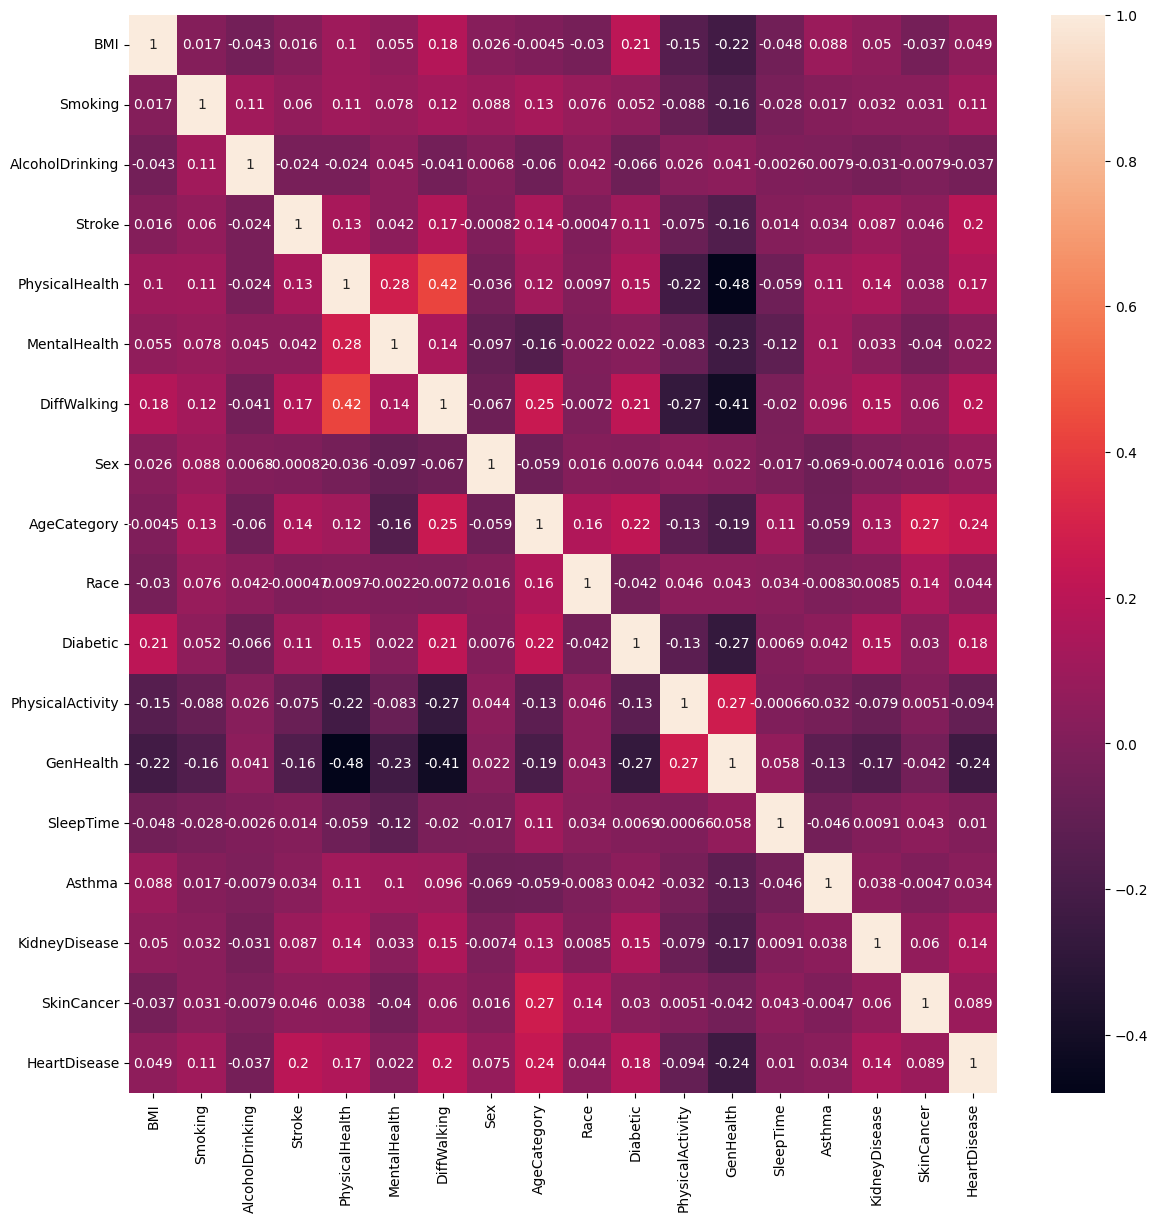

In [72]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True)

<Axes: >

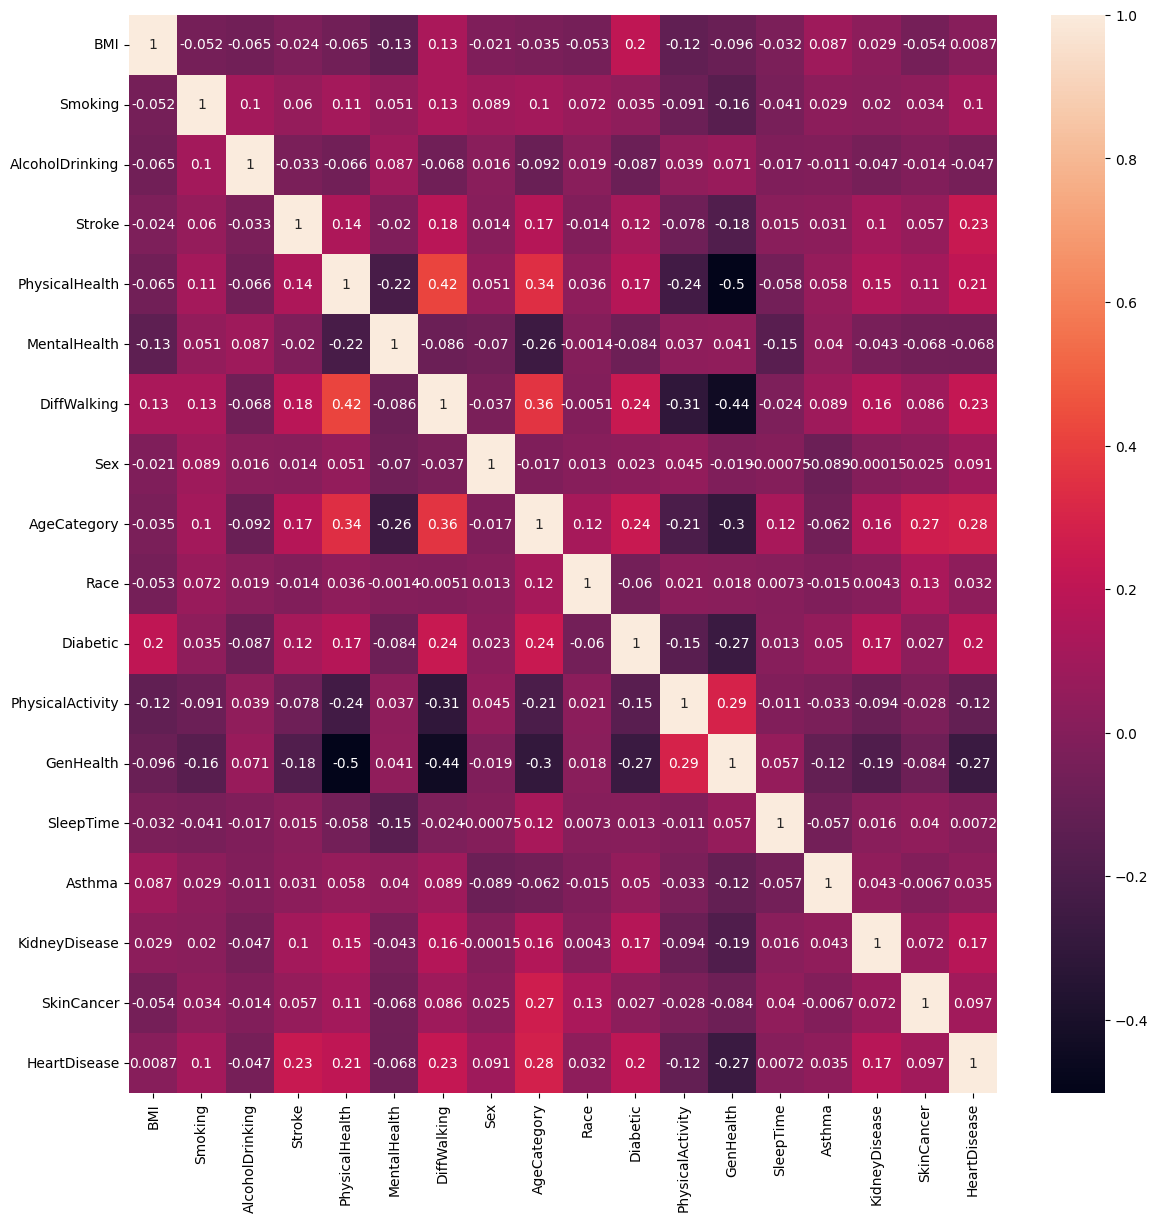

In [73]:
plt.figure(figsize=(14,14))
sns.heatmap(df_outliers.corr(), annot=True)

<Axes: >

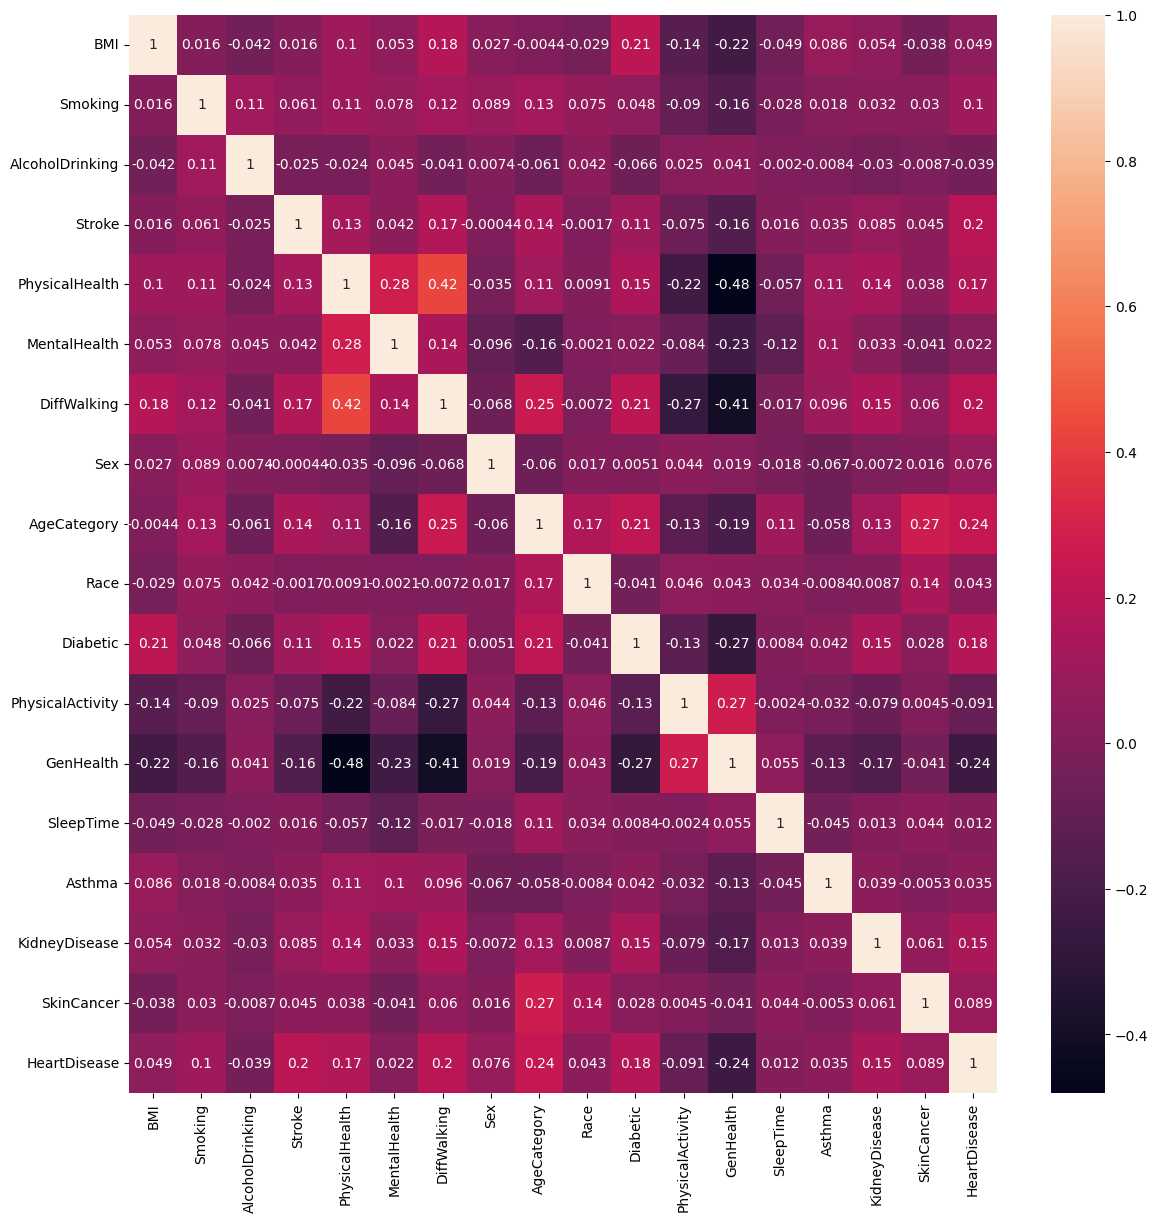

In [74]:
plt.figure(figsize=(14,14))
sns.heatmap(df_sin_outliers.corr(), annot=True)

df_sin_outliers tiene, a simple vista, colores más oscuros en el heatmap. Las correlaciones entre las variables son menores, será más difícil hacer un buen modelo

Ninguna variable tiene una correlación fuerte con HeartDisease

## 7. Características de los datos

Como ya he indicado antes, los datos del estudio se caracterizan por no estar balanceados. Es decir, dentro de la variable objetivo 'HeartDisease', la fracción de positivos o 1s es muy inferior a la fracción de negativos o 0s. Como se ve en el código, en este caso los negativos alcanzan casi el 91% del total de los datos.

In [75]:
df['HeartDisease'].value_counts(normalize=True)

HeartDisease
0    0.909638
1    0.090362
Name: proportion, dtype: float64

Por lo tanto, a la hora de medir la eficacia del modelo, puede resultar totalmente engañoso, ya que cualquier modelo de Machine Learning que se implemente, detectará muy fácilmente los casos negativos, mientras que no será así para los casos positivos. Para definir bien el problema, vamos a considerar tres parámetros muy importantes que se tendrán en cuenta en la evaluación de todas las alternativas que se planteen.
- Accuracy: indica el número total de predicciones correctas, dividido entre el número total de predicciones
- Precision: para cualquier clase, se define como la capacidad para determinar si un punto pertenece a esa clase. Es decir, de todas las predicciones sobre una clase, la relación entre los aciertos y el total de predicciones sobre esa clase. En este estudio, sería la relación entre el número de diagnósticos positivos correctos y el total de diagnósticos positivos. 
- Recall: es la relación entre los aciertos de una clase y todos los elementos que pertenece a esa. Aquí tendríamos un ratio entre los diagnósticos positivos correctos y todos los enfermos existentes. 

Los datos no balanceados suelen tener una alta precisión para la clase mayoritaria, es decir, para detectar los sujetos sanos, pero tienen  un bajo recall en la clase minoritaria, de todos los enfermos, sólo detectará una pequeña parte. Por consiguiente, además de los parámetros indicados, también consideraremos el F1 Score, que combina precisión y recall en una sóla fórmula:

F1_Score = 2\*Precision\*Recall/(Precision + Recall) 

Se contemplan varias estrategias a seguir para procesar estos datos no balanceados:
- Ajuste de parámetros del modelo: Se trata de ajustar parámetros propios de cada algoritmo, para reducir el peso de la fracción mayoritaria, frente a la minoritaria. Tanto *LogisticRegression* como *DecisionTreeClasiffier* tiene el parámetro *class_weight*, con el que se puede regular el peso o importancia de cada fracción, pero otros algoritmos no.
- Muestras sintéticas: Podemos crear muestras de forma artificial con algoritmos que siguen la tendencia del grupo minoritario. Como inconveniente, se puede llegar a cambiar la distribución de la clase y dificultar la clasificación.
- Métodos de Ensemble: Se entrenan varios modelos y entre todos, se obtiene el resultado final por votación, tomando muestras de forma equilibrada. 

Inicialmente aplicaremos el *LogisticRegression* de los datos no balanceados, y estableceremos los resultados de este modelo como línea base del resto de modelos que entrenaremos. Los resultados obtenidos son:


| Parámetro | df_sin_outliers | df original | df_outliers |
| :-----------| :---------------:| :----------: | :-----------: |
| Accuracy | 0.9263 | 0.9109 | 0.8424 |
| Precision | 0.4839 | 0.5328 | 0.5714 |
| Recall | 0.0589 | 0.1088 | 0.1788 |
| F1 | 0.1049 | 0.1807 | 0.2723 | 

# Bibliografía
https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c

https://imbalanced-learn.org/stable/user_guide.html

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

ADASYN: Adaptive Synthetic Sampling Approach for Imbalanced Learning. Haibo He, Yang Bai, Edwardo A. Garcia, and Shutao Li